In [1]:
from sklearn.manifold import TSNE
from mtools.plot_preamble import *
from mtools import colors_names, load_h5
%matplotlib inline

domains = ['handheld', 'pocket', 'handbag', 'trolley']

In [ ]:
def load_data(file_path):
    store = pd.HDFStore(file_path, mode='r')
    all_df = store.get('all_imu')
    store.close()
    imu_data = all_df[['AccX', 'AccY', 'AccZ', 'GysX', 'GysY', 'GysZ']].values
    index_list = range(200*2, imu_data.shape[0]-1, 10)
    data = np.stack([imu_data[index-200:index, :] for index in index_list], axis=0)
    return data

def get_embedded(Xs, n_components=2):
    nums = np.array([x.shape[0] for x in Xs]) if len(Xs[0].shape)>1 else np.array([1 for x in Xs])
    if type(Xs[0]) is not np.ndarray:
        Xs = tuple(x.cpu().numpy() for x in Xs)
    X  = np.vstack(Xs)
    X_embedded = TSNE(n_components=n_components).fit_transform(X)
    Xs_embedded = np.split(X_embedded, nums.cumsum()[:-1])
    return Xs_embedded

domains = ['handheld', 'pocket', 'handbag', 'trolley']
Xs = [load_data(osp.join('../data/OxIOD_h5', f'{domain}', 'data1_1', 'data.h5')) for domain in domains]
print([x.shape for x in Xs])
Xs = [x.reshape(x.shape[0], -1) for x in Xs]
print([x.shape for x in Xs])
Xs_100 = [x[np.random.choice(x.shape[0], 100, replace=False)] for x in Xs]
ori_Xs_embedded = get_embedded(Xs_100)


In [9]:
file_path = '../output/transposemtfinal/mt_base/oxiod_h5_1_N/transposemt_extract_features_e1.h5'
data = load_h5(file_path)
domains = ['handheld', 'handbag', 'pocket', 'trolley']
Xs = [data[domain] for domain in domains]
Xs = [x.reshape(x.shape[0], -1) for x in Xs]
print([x.shape for x in Xs])
Xs_100 = [x[np.random.choice(x.shape[0], 100, replace=False)] for x in Xs]
mt_Xs_embedded = get_embedded(Xs_100)

[(18133, 1600), (4407, 1600), (6186, 1600), (2068, 1600)]


/home/wjk/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/wjk/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [11]:
file_path = '../output/tpfinal4/base/oxiod_h5_1_N/transposemt3_extract_features_e1.h5'
data = load_h5(file_path)
domains = ['handheld', 'handbag', 'pocket', 'trolley']
Xs = [data[domain] for domain in domains]
Xs = [x.reshape(x.shape[0], -1) for x in Xs]
print([x.shape for x in Xs])
Xs_100 = [x[np.random.choice(x.shape[0], 100, replace=False)] for x in Xs]
tp_Xs_embedded = get_embedded(Xs_100)

[(18133, 3200), (4407, 3200), (6186, 3200), (2068, 3200)]


/home/wjk/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/wjk/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [3]:
# np.save('data/ori_Xs_embedded.npy', np.stack(ori_Xs_embedded))
# np.save('data/mt_Xs_embedded.npy', np.stack(mt_Xs_embedded))
# np.save('data/tp_Xs_embedded.npy', np.stack(tp_Xs_embedded))

ori_Xs_embedded = np.load('data/ori_Xs_embedded.npy')
mt_Xs_embedded = np.load('data/mt_Xs_embedded.npy')
tp_Xs_embedded = np.load('data/tp_Xs_embedded.npy')

/tmp/ipykernel_5240/4190138059.py:30: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  plot_t_SNE([x[rand_choices] for x in ori_Xs_embedded], domains, legend=False, filename='figures/TSNE_origin')
/tmp/ipykernel_5240/4190138059.py:11: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xs_embedded[:,0], xs_embedded[:,1], c=colors[i%len(colors)], marker=markers[i], label=labels[i], s=markersize, edgecolor='k')


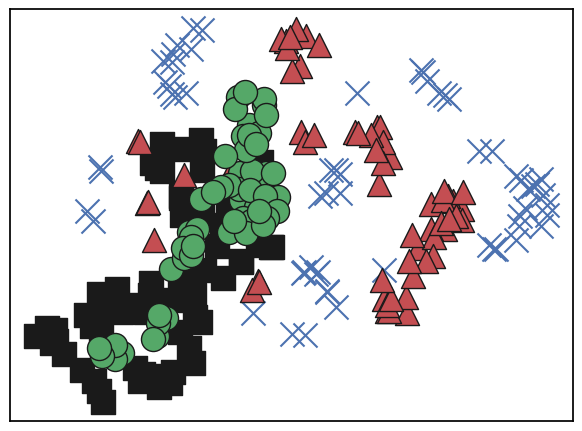

/tmp/ipykernel_5240/4190138059.py:31: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  plot_t_SNE([x[rand_choices] for x in mt_Xs_embedded], domains, legend=False, filename='figures/TSNE_MT')


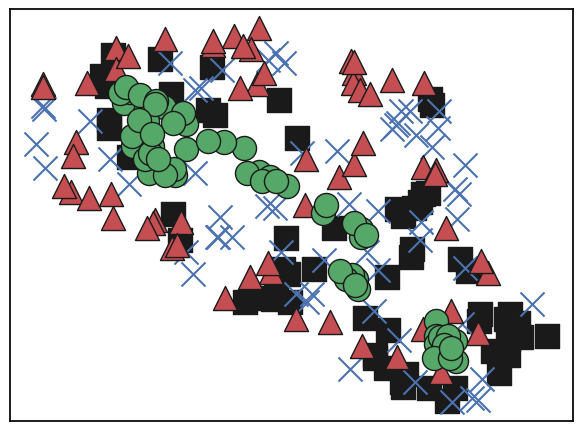

/tmp/ipykernel_5240/4190138059.py:32: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  plot_t_SNE([x[rand_choices] for x in tp_Xs_embedded], domains, loc='upper right', filename='figures/TSNE_DT')


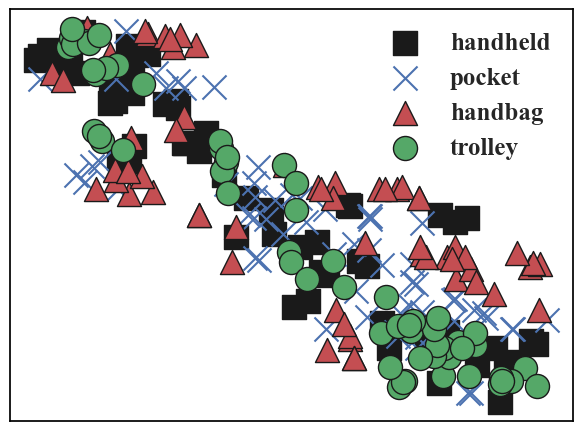

In [19]:
def plot_t_SNE(Xs_embedded, labels, fontsize=15, color='base', legend=True, markersize=300, loc="lower right", fontdict={'weight' : 'bold'}, markers='sx^o', filename=None):
    if color in colors_names:
        colors = colors_names[color]
    else:
        cmap=plt.get_cmap(color)
        gradients = np.linspace(0, 1, len(Xs_embedded))
        colors = [cmap(gradient) for gradient in gradients]
    plt.figure()
    for i,xs_embedded in zip(range(len(Xs_embedded)), Xs_embedded):
        # plt.plot(xs_embedded[:,0], xs_embedded[:,1], colors[i], label=labels[i])
        plt.scatter(xs_embedded[:,0], xs_embedded[:,1], c=colors[i%len(colors)], marker=markers[i], label=labels[i], s=markersize, edgecolor='k')
    plt.tick_params(labelsize=fontsize)
    plt.tight_layout()
    # plt.xlabel('z1',get_font(fontsize))
    # plt.ylabel('z2',get_font(fontsize))
    if legend:
        plt.legend(loc=loc,prop=fontdict, frameon=True, framealpha=0.5, facecolor='w', edgecolor='w', fancybox=False, fontsize=fontsize)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    if filename is not None:
        plt.savefig(filename)
        plt.savefig(f'{filename}.png', bbox_inches='tight')
        plt.savefig(f'{filename}.pdf', bbox_inches='tight', transparent=True, pad_inches=0)
    
    plt.show()

rand_choices = [np.random.choice(100, 60, replace=False)]
plot_t_SNE([x[rand_choices] for x in ori_Xs_embedded], domains, legend=False, filename='figures/TSNE_origin')
plot_t_SNE([x[rand_choices] for x in mt_Xs_embedded], domains, legend=False, filename='figures/TSNE_MT')
plot_t_SNE([x[rand_choices] for x in tp_Xs_embedded], domains, loc='upper right', filename='figures/TSNE_DT')

In [15]:
print([np.random.choice(100, 50, replace=False)])

[array([58, 92, 21,  5, 78, 65, 63, 43, 74, 27, 76, 19, 41, 50, 86, 28, 73,
        6, 38, 51, 75, 13, 61, 39, 14, 17, 96, 71, 25, 67, 34, 97, 64, 40,
       49,  0, 52, 35, 72, 69, 31, 60, 46, 47, 83, 12, 88, 62, 42, 99])]
